In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define a simple logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize model, loss function, and optimizer
model = LogisticRegressionModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on test data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs >= 0.5).float()
    accuracy = (test_predictions == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')

# Compare results with Scikit-learn's logistic regression model
sk_logreg = LogisticRegression(fit_intercept=False, penalty='none')
sk_logreg.fit(X_train, y_train)
sk_accuracy = sk_logreg.score(X_test, y_test)
print(f'Scikit-learn Logistic Regression Accuracy: {sk_accuracy * 100:.2f}%')


Epoch [100/1000], Loss: 0.7297
Epoch [200/1000], Loss: 0.5574
Epoch [300/1000], Loss: 0.4751
Epoch [400/1000], Loss: 0.4311
Epoch [500/1000], Loss: 0.4052
Epoch [600/1000], Loss: 0.3887
Epoch [700/1000], Loss: 0.3776
Epoch [800/1000], Loss: 0.3698
Epoch [900/1000], Loss: 0.3642
Epoch [1000/1000], Loss: 0.3600
Test Accuracy: 88.00%
Scikit-learn Logistic Regression Accuracy: 87.50%


/Users/jameschen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


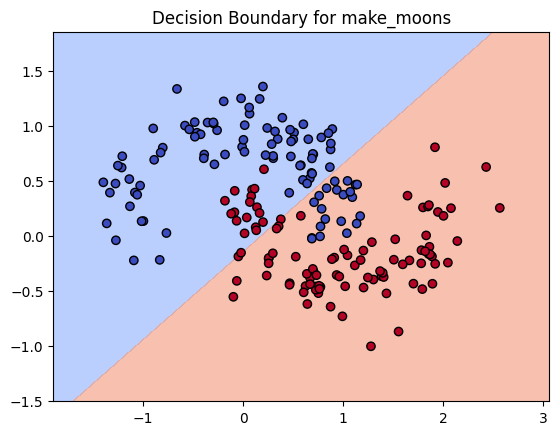

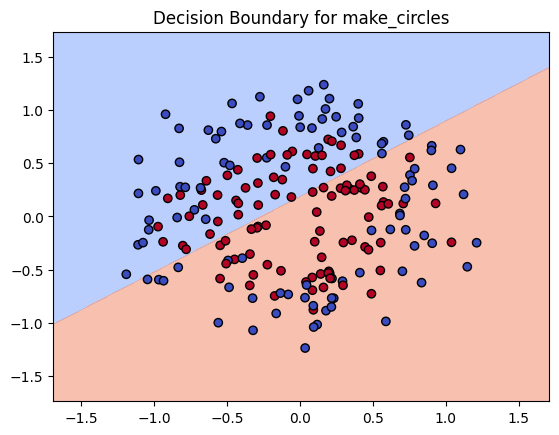

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Helper function to plot decision boundary
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title(title)
    plt.show()

# Experiment with make_moons dataset
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
X_train_moons_tensor = torch.tensor(X_train_moons, dtype=torch.float32)
y_train_moons_tensor = torch.tensor(y_train_moons, dtype=torch.float32).view(-1, 1)

# Train the model on make_moons dataset
model = LogisticRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
for epoch in range(num_epochs):
    outputs = model(X_train_moons_tensor)
    loss = criterion(outputs, y_train_moons_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot decision boundary for make_moons
plot_decision_boundary(model, X_test_moons, y_test_moons, "Decision Boundary for make_moons")

# Experiment with make_circles dataset
X_circles, y_circles = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)
X_train_circles_tensor = torch.tensor(X_train_circles, dtype=torch.float32)
y_train_circles_tensor = torch.tensor(y_train_circles, dtype=torch.float32).view(-1, 1)

# Train the model on make_circles dataset
model = LogisticRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
for epoch in range(num_epochs):
    outputs = model(X_train_circles_tensor)
    loss = criterion(outputs, y_train_circles_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot decision boundary for make_circles
plot_decision_boundary(model, X_test_circles, y_test_circles, "Decision Boundary for make_circles")


### Revised Deeper Network ###

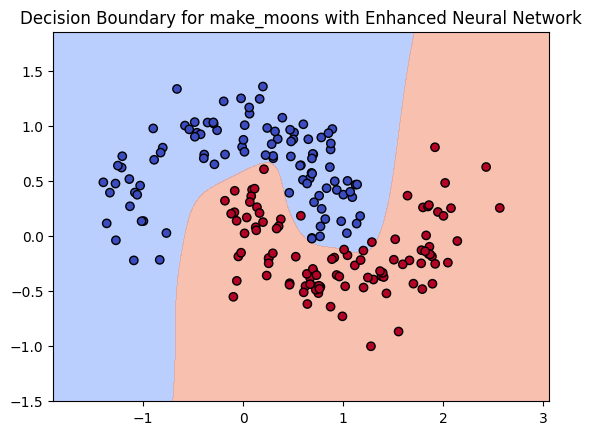

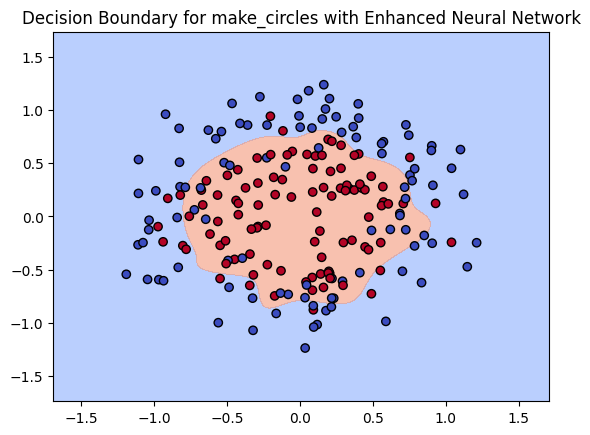

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define a deeper and wider neural network model
class EnhancedNeuralNetwork(nn.Module):
    def __init__(self):
        super(EnhancedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 32)  # First hidden layer with 32 neurons
        self.fc2 = nn.Linear(32, 64) # Second hidden layer with 64 neurons
        self.fc3 = nn.Linear(64, 32) # Third hidden layer with 32 neurons
        self.fc4 = nn.Linear(32, 1)  # Output layer

    def forward(self, x):
        x = torch.tanh(self.fc1(x))   # Using tanh for nonlinear activation
        x = torch.tanh(self.fc2(x))   # More nonlinearity with tanh
        x = torch.tanh(self.fc3(x))
        return torch.sigmoid(self.fc4(x))

# Helper function to plot decision boundary
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title(title)
    plt.show()

# Experiment with make_moons dataset
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
X_train_moons_tensor = torch.tensor(X_train_moons, dtype=torch.float32)
y_train_moons_tensor = torch.tensor(y_train_moons, dtype=torch.float32).view(-1, 1)

# Train the model on make_moons dataset
model = EnhancedNeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer

num_epochs = 1500  # Increased number of epochs
for epoch in range(num_epochs):
    outputs = model(X_train_moons_tensor)
    loss = criterion(outputs, y_train_moons_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot decision boundary for make_moons
plot_decision_boundary(model, X_test_moons, y_test_moons, "Decision Boundary for make_moons with Enhanced Neural Network")

# Experiment with make_circles dataset
X_circles, y_circles = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)
X_train_circles_tensor = torch.tensor(X_train_circles, dtype=torch.float32)
y_train_circles_tensor = torch.tensor(y_train_circles, dtype=torch.float32).view(-1, 1)

# Train the model on make_circles dataset
model = EnhancedNeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    outputs = model(X_train_circles_tensor)
    loss = criterion(outputs, y_train_circles_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot decision boundary for make_circles
plot_decision_boundary(model, X_test_circles, y_test_circles, "Decision Boundary for make_circles with Enhanced Neural Network")
